#### breast_cancer.data Column Details


 Attribute Information: (class attribute has been moved to last column)<br>
<pre>
     Attribute                     Domain
   -- -----------------------------------------
1. Sample code number            id number
2. Clump Thickness               1 - 10
3. Uniformity of Cell Size       1 - 10
4. Uniformity of Cell Shape      1 - 10
5. Marginal Adhesion             1 - 10
6. Single Epithelial Cell Size   1 - 10
7. Bare Nuclei                   1 - 10
8. Bland Chromatin               1 - 10
9. Normal Nucleoli               1 - 10
10. Mitoses                      1 - 10
11. Class:                       (2 for benign, 4 for malignant)
</pre>

#### Classification Exercise

1) Read the dataset 'breast_cancer.data'<br>
2) Remove/handle the null values.<br>
3) Rename the column names appropritely as per the attribute info mentioned above<br>
4) Based on the general understanding of the dataset, select independent features and dependent feature<br>
5) Split the dataset into training and testing dataset with test_size 25%<br>
6) Apply Decision Tree Classification and predict the class for the test data.<br>
7) Find the confusion matrix, accuracy_score and generate classification_report.<br>
8) Apply Radom Forest Classification and predict the class for the test data.<br>
9) Find the confusion matrix, accuracy_score and generate classification_report.<br>


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df = pd.read_csv('/content/breast_cancer.data')

In [170]:
df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


###Rename the column names appropritely as per the attribute info mentioned above

In [171]:
df.rename(columns={'1000025':'Sample code number','5':'Clump Thickness','1':'Uniformity of Cell Size','1.1':'Uniformity of Cell Shape','1.2':'Marginal Adhesion','2':'Single Epithelial Cell Size','1.3':'Bare Nuclei',
                   '3':'Bland Chromatin','1.4':'Normal Nucleoli','1.5':'Mitoses','2.1':'Class'},inplace=True)

In [172]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [173]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


###Remove/handle the null values.

In [174]:
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'],errors='coerce')

In [175]:
df.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [176]:
df.fillna(df['Bare Nuclei'].mean(),axis=1,inplace=True)

In [177]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           698 non-null    int64  
 1   Clump Thickness              698 non-null    int64  
 2   Uniformity of Cell Size      698 non-null    int64  
 3   Uniformity of Cell Shape     698 non-null    int64  
 4   Marginal Adhesion            698 non-null    int64  
 5   Single Epithelial Cell Size  698 non-null    int64  
 6   Bare Nuclei                  698 non-null    float64
 7   Bland Chromatin              698 non-null    int64  
 8   Normal Nucleoli              698 non-null    int64  
 9   Mitoses                      698 non-null    int64  
 10  Class                        698 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [179]:
df['Bare Nuclei'].value_counts()

1.000000     401
10.000000    132
5.000000      30
2.000000      30
3.000000      28
8.000000      21
4.000000      19
3.548387      16
9.000000       9
7.000000       8
6.000000       4
Name: Bare Nuclei, dtype: int64

Non linear data

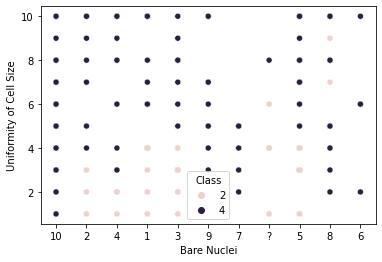

In [114]:
sns.scatterplot(x=df['Uniformity of Cell Size'],y=df['Bare Nuclei'],hue=df['Class'])
plt.show()

###Based on the general understanding of the dataset, select independent features and dependent feature

In [180]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

###Independent feature

In [181]:
x

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1002945,5,4,4,5,7,10.0,3,2,1
1,1015425,3,1,1,1,2,2.0,3,1,1
2,1016277,6,8,8,1,3,4.0,3,7,1
3,1017023,4,1,1,3,2,1.0,3,1,1
4,1017122,8,10,10,8,7,10.0,9,7,1
...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2.0,1,1,1
694,841769,2,1,1,1,2,1.0,1,1,1
695,888820,5,10,10,3,7,3.0,8,10,2
696,897471,4,8,6,4,3,4.0,10,6,1


###Dependent Features

In [182]:
y

0      2
1      2
2      2
3      2
4      4
      ..
693    2
694    2
695    4
696    4
697    4
Name: Class, Length: 698, dtype: int64

###Split the dataset into training and testing dataset with test_size 25%

In [183]:
from sklearn.model_selection import train_test_split

In [234]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [235]:
x_train

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
399,1211265,3,10,8,7,6,9.0,9,3,8
333,785615,8,6,7,3,3,10.0,3,4,2
186,1206841,10,5,6,10,6,10.0,7,7,10
537,1135090,4,1,1,1,2,1.0,2,1,1
557,1321348,2,1,1,1,2,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...
635,1268952,10,10,7,8,7,1.0,10,10,3
311,691628,8,6,4,10,10,1.0,3,5,1
515,1320077,1,1,1,1,1,1.0,1,1,1
675,1365328,1,1,2,1,2,1.0,2,1,1


In [186]:
y_test

244    2
562    2
135    2
307    4
522    4
      ..
455    4
186    4
470    2
22     4
18     2
Name: Class, Length: 175, dtype: int64

###Apply Radom Forest Classification and predict the class for the test data.

In [209]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
rfc = RandomForestClassifier(criterion='gini',max_depth=2,min_samples_split=4,max_features='sqrt')

In [237]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [241]:
y_pred = rfc.predict(x_test)

###Test Data prediction

In [242]:
y_pred

array([2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2,
       2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2,
       4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2])

In [238]:
print('trainin score of the model : ',rfc.score(x_train,y_train))
print('testing score of the model : ',rfc.score(x_test,y_test))

trainin score of the model :  0.9694072657743786
testing score of the model :  0.9714285714285714


In [194]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

####accuracy score

In [243]:
accuracy_score(y_test,y_pred)

0.9714285714285714

confusion_matrix

In [244]:
confusion_matrix(y_test,y_pred)

array([[112,   3],
       [  2,  58]])

###classification report

In [245]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       115
           4       0.95      0.97      0.96        60

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175



# ***************************************************************************end***********************************************************************